In [36]:
import tensorflow as tf
import os
import tensorflow_datasets as tfds
import math

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

datasets, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True) # Loads the data
train_dataset, test_dataset = datasets['train'], datasets['test'] # Splits the dataset

BATCH_SIZE = 32
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
num_test_examples = metadata.splits['test'].num_examples

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #flattens the 3d image into one array of numbers
    tf.keras.layers.Dense(512, activation=tf.nn.relu), #creates 128 level of neural networks
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #softmax produces probability distribution 
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 

model.load_weights(checkpoint_path)

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Restored model, accuracy: {:5.2f}%".format(100 * test_accuracy))


313/313 [==============================] - 2s 5ms/step - loss: 0.5160 - accuracy: 0.8236
Restored model, accuracy: 82.36%


In [44]:
import cv2 
import numpy as np

original_image = cv2.imread("../trouser_test.jpeg")

resized_image = cv2.resize(original_image, (28, 28))
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
final_image = np.expand_dims(gray_image, axis=0)
print(final_image.shape)



predictions = model.predict(final_image)

predictions.shape
print(predictions)


(1, 28, 28)


1/1 [==============================] - 0s 62ms/step
[[6.11848955e-04 6.80451195e-10 1.37612843e-09 1.62111297e-10
  2.24017246e-11 5.45252157e-13 1.17622195e-02 9.01016729e-13
  9.87625897e-01 1.02017549e-13]]


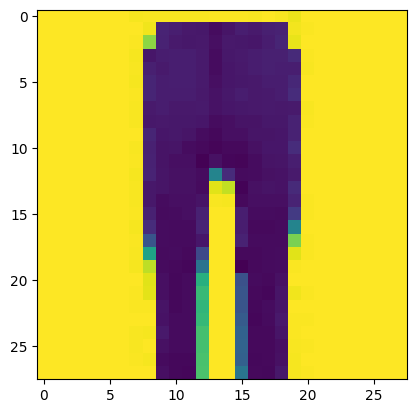

In [43]:
import matplotlib.pyplot as plt
plt.imshow(gray_image)